In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Neural Network implementation with Matrices #1: Predefined Network

### Some additional vector and matrix manipulation functions

$A$ is a matrix defined as:

In [2]:
A = np.array([[1, 3, 5, -1],
              [0, -2, -7, 3]])
print (A)

[[ 1  3  5 -1]
 [ 0 -2 -7  3]]


What is the shape of this matrix:

Transform the matrix so that its rows become its columns and the columns its rows:

What is the shape of the **transposed** matrix A:

____

$B$ is a 6-dimensional row vector:

In [9]:
B = np.array([1,0,1,0,1,0])
print (B)

[1 0 1 0 1 0]


Reshape the vector $B$ vector into a $3\times 2$ matrix:

Reshape the vector $B$ vector into a $6\times 1$ matrix:

________

## Neural Network's Architecture and Data set

The architecture of the network we will implement by using matrices will remain the same as in the previous example, but we will display it by using our new naming convention:

<img src="img/neural_networks_26-new.png" alt="drawing" width="950"/>

We will also use the same dataset we used before:

In [15]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

In [16]:
labels = np.array([  1,
                     0,
                     1,
                     0,
                     0,
                     1,
                     0,
                     1,
                     0,
                     0])

In [17]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i, d in enumerate(data):
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

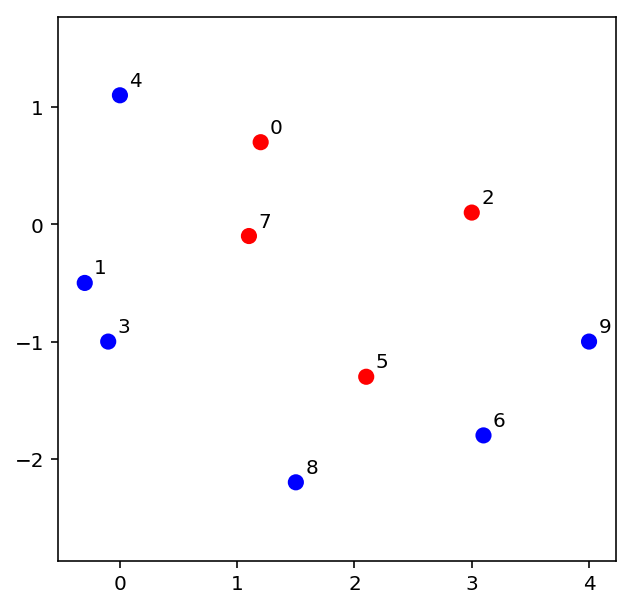

In [18]:
plot_data(data, labels)

## Initialising neural network layers

### Weights

<img src="img/neural_networks_29.png" alt="drawing" width="400"/>

#### Weights of the layer $l_2$

Since the layer 2 has 3 neurons, and the layer 1 has 2 neurons, this matrix will be of the size $3x2$.

$$
\mathbf{W}^{(l_2)}
=
\underset{\mathbf{3x2}}{
\begin{bmatrix}
w_{11}^{(l_2)} & w_{12}^{(l_2)}\\
w_{21}^{(l_2)} & w_{22}^{(l_2)}\\
w_{31}^{(l_2)} & w_{32}^{(l_2)}\\
\end{bmatrix}\\
}
$$

By using the  _nympy_'s function `randn`, encode the matrix $\mathbf{W}^{(l_2)}$, fill it with normally distributed random values  and store it in the variable `W_2`:

#### Weights of the layer $l_3$

The layer 3 has 2 neurons and its previous layer ($l_2$) has 3 neurons, thus 3 activations. For this reason, the weight matrix $\mathbf{W}^{(l_3)}$ will be of the size $2x3$.

$$\
\mathbf{W}^{(l_3)}
=
\underset{\mathbf{2x3}}{
\begin{bmatrix}
w_{11}^{(l_3)} & w_{12}^{(l_3)} & w_{13}^{(l_3)}\\
w_{21}^{(l_3)} & w_{22}^{(l_3)} & w_{23}^{(l_3)}\\
\end{bmatrix}\\
}
$$

Encode the matrix $\mathbf{W}^{(l_3)}$, fill it with normally distributed random values  and store it in the variable `W_3`:

### Biases

<img src="img/neural_networks_30.png" alt="drawing" width="400"/>

#### Biases of the layer $l_2$

Since the layer 2 has 3 neurons, this matrix will be of the size $3x1$.

$$
\mathbf{b}^{(l_2)}
=
\underset{\mathbf{3x1}}{
\begin{bmatrix}
b_{1}^{(l_2)}\\
b_{2}^{(l_2)}\\
b_{3}^{(l_2)}\\
\end{bmatrix}\\
}
$$

By using the  _nympy_'s function `random.randn`, encode the vector $\mathbf{b}^{(l_2)}$, fill it with normally distributed random values  and store it in the variable `b_2`:

#### Biases of the layer $l_3$

Since the third layer has two neurons, it will also have 2 biases:

$$
\mathbf{b}^{(l_3)}
=
\underset{\mathbf{2x1}}{
\begin{bmatrix}
b_{1}^{(l_3)}\\
b_{2}^{(l_3)}\\
\end{bmatrix}\\
}
$$

Encode the vector $\mathbf{b}^{(l_3)}$, fill it with normally distributed random values  and store it in the variable `b_3`:

### Activations

<img src="img/neural_networks_31.png" alt="drawing" width="400"/>

#### Activations of the layer $l_1$

$$
\mathbf{a}^{(l_1)}
=
\underset{\mathbf{2x1}}{
\begin{bmatrix}
a_{1}^{(l_1)}\\
a_{2}^{(l_1)}\\
\end{bmatrix}\\
}
$$

Encode the vector $\mathbf{a}^{(l_1)}$, fill it with the coordinates of the first data point `[1.2, 0.7]` and store it in the variable `a_1`. You can use array reshape and/or transpose functions.

#### Activations of the layer $l_2$

To compute the weighted sum for the layer 2, we can use the following formula:

\begin{align*}  
\underset{\mathbf{3x1}}{
\begin{bmatrix}
z_1^{(l_2)}\\
z_2^{(l_2)}\\
z_3^{(l_2)}\\
\end{bmatrix}}
&=
\underset{\mathbf{3x2}}{
\begin{bmatrix}
w_{11}^{(l_2)} & w_{12}^{(l_2)}\\
w_{21}^{(l_2)} & w_{22}^{(l_2)}\\
w_{31}^{(l_2)} & w_{32}^{(l_2)}\\
\end{bmatrix}\\
}
\times
\underset{\mathbf{2x1}}{
\begin{bmatrix}
a_{1}^{(l_1)}\\
a_{2}^{(l_1)}\\
\end{bmatrix}\\
}
+
\underset{\mathbf{3x1}}{
\begin{bmatrix}
b_{1}^{(l_2)}\\
b_{2}^{(l_2)}\\
b_{3}^{(l_2)}\\
\end{bmatrix}\\
}\\\\
\end{align*}  

$$
\mathbf{z}^{(l_2)}=\mathbf{W}^{(l_2)}\cdot \mathbf{a}^{(l_1)}+\mathbf{b}^{(l_2)}
$$

Compute the vector containing the weighted sums of the layer 2 and store it in the variable`z_2`:

To compute the activations, of the layer 2we just need to apply sigmoid activation to the matrix $\mathbf{z}^{(l_2)}$ `(z_2)`

$$
\mathbf{a}^{(l_2)}
\equiv
\begin{bmatrix}
a_{1}^{(l_2)}\\
a_{2}^{(l_2)}\\
a_{3}^{(l_2)}\\
\end{bmatrix}
=
\sigma(\mathbf{z}^{(l_2)})
\equiv
\sigma
\left(\;
\begin{bmatrix}
z_{1}^{(l_2)}\\
z_{2}^{(l_2)}\\
z_{3}^{(l_2)}\\
\end{bmatrix}\;
\right)
\equiv
\begin{bmatrix}
\sigma(z_1^{(l_2)})\\
\sigma(z_2^{(l_2)})\\
\sigma(z_3^{(l_2)})\\
\end{bmatrix}
$$

Define the sigmoid function that takes vector input:

Compute the activations of the second layer,  $\mathbf{a}^{(l_2)}$ and store it in the variable `a_2`:

#### Activations of the layer $l_3$

To compute the activations for the layer 3, we apply the same procedure we did for the level 2. To compute the weighted average matrix of the layer 3 we compute a matrix product of the weight matrix of the layer 3 with the activation matrix of the layer before (layer 2), and add the bias matrix of the level 3:

\begin{align*}  
\underset{\mathbf{2x1}}{
\begin{bmatrix}
z_1^{(l_3)}\\
z_2^{(l_3)}\\
\end{bmatrix}}
&=
\underset{\mathbf{2x3}}{
\begin{bmatrix}
w_{11}^{(l_3)} & w_{12}^{(l_3)} & w_{13}^{(l_3)}\\
w_{21}^{(l_3)} & w_{22}^{(l_3)} & w_{23}^{(l_3)}\\
\end{bmatrix}\\
}
\times
\underset{\mathbf{3x1}}{
\begin{bmatrix}
a_{1}^{(l_2)}\\
a_{2}^{(l_2)}\\
a_{3}^{(l_2)}\\
\end{bmatrix}\\
}
+
\underset{\mathbf{2x1}}{
\begin{bmatrix}
b_{1}^{(l_3)}\\
b_{2}^{(l_3)}\\
\end{bmatrix}\\
}\\\\
\end{align*} 

$$
\mathbf{z}^{(l_3)}=\mathbf{W}^{(l_3)}\times \mathbf{a}^{(l_2)}+\mathbf{b}^{(l_3)}
$$

Compute the vector containing the weighted sums of the layer 3 and store it in the variable`z_3`:

To compute the final activation of the layer 3 (output layer), we apply the sigmoid function to the weighted average:

$$
\mathbf{a}^{(l_3)}
\equiv
\begin{bmatrix}
a_{1}^{(l_3)}\\
a_{2}^{(l_3)}\\
\end{bmatrix}
=
\sigma(\mathbf{z}^{(l_3)})
\equiv
\begin{bmatrix}
\sigma(z_1^{(l_3)})\\
\sigma(z_2^{(l_3)})\\
\end{bmatrix}
$$

Compute the activations of the third layer, $\mathbf{a}^{(l_3)}$ and store it in the variable `a_3`:

## Cost function

 The data point we were using to compute the forward pass contains coordinates `[1.2, 0.7]` , and it is associated with the label `1`. 

As we have seen in the previous case, we need to interpret the data labels `1` and `0` by means of 2 neurons. The output of the first neuron encodes the probability that the label is `1`, and the second the probability that the label is `0`. In the last exercise, we used the function `convert_label` to convert the labels:

In [49]:
def convert_label(label):
    if (label == 1):
        return (1,0)
    if (label == 0):
        return (0,1)

In [56]:
convert_label(1)

array([[1],
       [0]])

In [57]:
convert_label(0)

array([[0],
       [1]])

Redefine the function `convert_label`to output column vectors of probabilities:

Convert the label associated with the first data point `[1.2, 0.7]`, and store it into the variable `y`:

Again, we will be using the _quadratic cost function_ to compute the cost of our example. Since we have two output layers, the formula for computing the cost of a single training example we will be:

$$
TC = (a_1^{(l_3)}-y_1)^2+(a_2^{(l_3)}-y_2)^2
$$

This means that we need to substract the activation of each neuron in the output layer from the true label associated with this neuron, square it and sum the squared terms. This same equation can be represented in simpler terms by using vectors:

$$
TC =\|a^{(l_3)}-y \|^2
$$

Compute the total cost and store it in the variable `TC`:

## Computing the backward pass

### Computing the derivatives of the cost function

The computation of the partial derivatives in $\frac{\partial C_x}{\partial a^{(l_3)}}$ boils down to a difference between two column vectors:

$$\frac{\partial TC}{\partial a^{(l_3)}} = 2(a^{(l_3)}-y)$$

Compute $\frac{\partial TC}{\partial a^{(l_3)}}$:

We rename the partial derivates of the total cost in terms of the weighted sums $\frac{\partial TC}{\partial z^{(l_3)}}$ and $\frac{\partial TC}{\partial z^{(l_2)}}$ store them in the following vectors:

$$
\delta^{(l_3)}
=
\begin{bmatrix}
\delta_1^{(l_3)}\\
\delta_2^{(l_3)}\\
\end{bmatrix};\quad
\delta^{(l_2)}
=
\begin{bmatrix}
\delta_1^{(l_2)}\\
\delta_2^{(l_2)}\\
\delta_3^{(l_2)}\\
\end{bmatrix};
$$

### Computing the derivatives of the  weighted sums in the output layer $\delta^{(l_3)}$:

Computing the $\delta^{(l_3)}$ is described using the previously defined formula: <br> <br>
$$
\delta^{(l_3)}=2\left(\mathbf{a}^{(l_3)}-\mathbf{y}\right)\odot \mathbf{a}^{(l_3)} \odot \left(\mathbf{1}-\mathbf{a}^{(l_3)}\right) 
$$

Compute $\delta^{(l_3)}$ and store it in a variable `delta_3`:

### Computing the derivatives of the weighted sums in the hidden layer $\delta^{(l_2)}$:

Computing the $\delta^{(l_2)}$ is described using the previously defined formula: <br> <br>
$$\delta^{(l_2)}=\mathbf{a}^{(l_2)}\left(1-\mathbf{a}^{(l_2)}\right)\odot \mathbf{W^T}^{(l_3)} \cdot \mathbf{\delta}^{(l_3)}$$

Compute $\delta^{(l_2)}$ and store it in a variable `delta_2`:

### Computing the derivatives of the biases in the output layer $\mathbf{b}^{(l_3)}$:

Once we know the partial derivatives of the cost in respect to the weighted averages, computing the biases is trivial. Since a bias is only added to the multiplications of weights and activations, its derivative is equal to 1. Therefore, the biases of a certain layer have the same value as the weighted averages of that layer:

Compute the vector containing partial derivatives of the total cost in terms of biases of the third layer, and store it in the variable `db_3`:

### Computing the derivatives of the biases of the hidden layer $\mathbf{b}^{(l_2)}$:

Compute the vector containing partial derivatives of the total cost in terms of biases of the second layer, and store it in the variable `db_2`:

### Computing the derivatives of the weights in the output layer $\mathbf{W}^{(l_3)}$:

We can compute the matrix product of the already computed weighted average of the layer 3 and this transposed activation matrix:

$$
\begin{align*}
\partial \mathbf{W}^{(l_3)}=
\delta^{(l_3)}\cdot\left(a^{(l_2)}\right)^T
&=
\underset{\mathbf{2x1}}{
\begin{bmatrix}
\delta_1^{(l_3)}\\
\delta_2^{(l_3)}\\
\end{bmatrix}}
\cdot
\underset{\mathbf{1x3}}{
\begin{bmatrix}
a_{1}^{(l_2)} & a_{2}^{(l_2)} & a_{3}^{(l_2)}
\end{bmatrix}}\\\\
&=
\underset{\mathbf{2x3}}{
\begin{bmatrix}
\delta_1^{(l_3)} a_{1}^{(l_2)} & \delta_1^{(l_3)} a_{2}^{(l_2)} & \delta_1^{(l_3)} a_{3}^{(l_2)} \\
\delta_2^{(l_3)} a_{1}^{(l_2)} & \delta_2^{(l_3)} a_{2}^{(l_2)} & \delta_2^{(l_3)} a_{3}^{(l_2)} \\
\end{bmatrix}}\\
\end{align*}
$$

Compute the vector containing partial derivatives of the total cost in terms of weights of the third layer, and store it in the variable `dW_3`:

### Computing the derivatives of the weights in the hidden layer $\mathbf{W}^{(l_2)}$:

We can compute the dot product of the already computed weighted average of the layer 2 and this transposed activation matrix:

$$
\begin{align*}
\partial \mathbf{W}^{(l_2)}=
\delta^{(l_2)}\cdot\left(a^{(l_1)}\right)^T
&=
\underset{\mathbf{3x1}}{
\begin{bmatrix}
\delta_1^{(l_2)}\\
\delta_2^{(l_2)}\\
\delta_3^{(l_2)}\\
\end{bmatrix}}
\cdot
\underset{\mathbf{1x2}}{
\begin{bmatrix}
a_{1}^{(l_2)} & a_{2}^{(l_2)}
\end{bmatrix}}\\\\
&=
\underset{\mathbf{3x2}}{
\begin{bmatrix}
\delta_1^{(l_3)} a_{1}^{(l_2)} & \delta_1^{(l_3)} a_{2}^{(l_2)} \\
\delta_2^{(l_3)} a_{1}^{(l_2)} & \delta_2^{(l_3)} a_{2}^{(l_2)} \\
\delta_3^{(l_3)} a_{1}^{(l_2)} & \delta_3^{(l_3)} a_{2}^{(l_2)}
\end{bmatrix}}\\
\end{align*}
$$

Compute the vector containing partial derivatives of the total cost in terms of weights of the second layer, and store it in the variable `dW_2`:

***

## Updating the weights and the biases of the neural network

Introduce the variable `step_size`, initialise it with a small value, and update the weights and biases:

What we want to achieve with training is that our network outputs the value as close as possible to the label, which the data is associated with. Print the current label:

Print the activation vector of the last layer:

Compute the new activation of the last layer by computing the forward pass again with the updated weights and biases:

Compute the cost/loss, and store it in the variable `TC_new`:

Compare the old cost, and the new cost: